<a href="https://colab.research.google.com/github/dieramirezma/Numerical-Methods/blob/main/Ejercicio_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Librerias
from scipy import stats
import numpy as np
from queue import Queue
import sys
from matplotlib import pyplot as plt

In [32]:
# Variables globales

mean_interarrival = 7.5
mean_service = 5

Q_LIMIT = 100
BUSY = 1
IDLE = 0

next_event_type = 0
next_event_type = 0
num_custs_delayed = 0
num_events = 0
server_status = 0

num_in_q = 0
time_arrival = [0 for i in range(101)]

area_num_in_q = 0.0 
area_server_status = 0.0
sim_time = 0.0
time_last_event = 0.0 
time_next_event = [0,0,0,0]
total_of_delays = 0.0
time_end = 540

arrival_times = []

times = []
B = []
Q = []

# Funciones 
def expon(mean):
  r = np.random.uniform(0.0001,0.9999)
  return -(mean)*np.log(r)

def initialize():
  global time_end,arrival_times, mean_interarrival, BUSY, IDLE, sim_time, server_status, num_in_q, time_last_event, num_custs_delayed, total_of_delays, area_num_in_q, area_server_status, time_next_event
  sim_time = 0.0

  server_status   = IDLE
  num_in_q        = 0
  time_last_event = 0.0

  num_custs_delayed  = 0
  total_of_delays    = 0.0
  area_num_in_q      = 0.0
  area_server_status = 0.0

  time_next_event[1] = sim_time + expon(mean_interarrival)
  time_next_event[2] = 1.0e+30
  time_next_event[3] = time_end
  arrival_times.append(expon(mean_interarrival))
  
  

def timing():
  global next_event_type, time_next_event, num_events, sim_time

  min_time_next_event = 1.0e+29

  next_event_type = 0

  for i in range (1, num_events + 1):
      if (time_next_event[i] < min_time_next_event):
        min_time_next_event = time_next_event[i]
        next_event_type = i


  if (next_event_type == 0):
    with open("output.txt","a") as file:
      file.write("\nEvent list empty at time %f" %sim_time)

    sys.exit(0) 
  
  sim_time = min_time_next_event


def arrive():
  global arrival_times, total_of_delays,num_custs_delayed,time_arrival, time_next_event, server_status, sim_time, mean_interarrival, BUSY, Q_LIMIT, num_in_q

  delay = 0

  time_next_event[1] = sim_time + expon(mean_interarrival)
  arrival_times.append(expon(mean_interarrival))

  if (server_status == BUSY):

    num_in_q += 1

    if (num_in_q > Q_LIMIT):

      with open("output.txt","a") as file:
        file.write("\nOverflow of the array time_arrival at")
        file.write(" time %f"%sim_time)
      print(num_in_q, Q_LIMIT)
      sys.exit(1)
    
    time_arrival[num_in_q] = sim_time
  
  else:

    delay = 0.0
    total_of_delays += delay

    num_custs_delayed += 1
    server_status = BUSY

    time_next_event[2] = sim_time + expon(mean_service)
    


def depart():
  global mean_service, num_custs_delayed,num_in_q, IDLE, server_status, time_next_event, sim_time, total_of_delays, time_arrival
  delay = 0

  if (num_in_q == 0):

    server_status = IDLE
    time_next_event[2] = 1.0e+30

  else:

    num_in_q -= 1

    delay= sim_time - time_arrival[1]
    total_of_delays += delay

    num_custs_delayed += 1
    time_next_event[2] = sim_time + expon(mean_service)

    for i in range(1, num_in_q + 1):
      time_arrival[i] = time_arrival[i + 1]

def report():
  global total_of_delays, num_custs_delayed, area_num_in_q, sim_time, area_server_status

  with open("output.txt","a") as file:
    file.write("\n\nAverage delay in queue %11.3f minutes\n\n"%(
            total_of_delays / num_custs_delayed))
    file.write("Average number in queue %10.3f\n\n"%(
            area_num_in_q / sim_time))
    file.write("Server utilization %15.3f\n\n"%(
            area_server_status / sim_time))
    file.write("Number of delays completed %7d" %(num_custs_delayed))
  

def update_time_avg_stats():
  global times,Q, B, area_num_in_q, sim_time, time_last_event, num_in_q, area_server_status, server_status
  
  time_since_last_event = 0

  time_since_last_event = sim_time - time_last_event
  time_last_event = sim_time


  area_num_in_q += num_in_q * time_since_last_event

  area_server_status += server_status * time_since_last_event

  Q.append(num_in_q)
  B.append(server_status)
  times.append(sim_time)

In [33]:
def main():

  global area_server_status, time_end, arrival_times,num_events, num_custs_delayed, next_event_type, mean_service, mean_interarrival
  

  num_events = 3
  with open("output1.txt","w") as file:
        file.write("")

  with open("output.txt","w") as file:
    file.write("Single-server queueing system\n\n")

  with open("output.txt","a") as file:
    file.write("Mean interarrival time%16.3f minutes\n\n"%(mean_interarrival))
    file.write("Mean service time%16.3f minutes\n\n"%(mean_service))
    file.write("Length of the simulation%9.3f minutes\n\n"%(time_end))
  
  initialize()
  i = 0

  with open("output1.txt","a") as file:
      file.write(f"\n{i}")
  
  # Do While simulation
  timing()

  update_time_avg_stats()

  if next_event_type == 1:
    arrive()
  elif next_event_type == 2:
    depart()
  elif next_event_type == 3:
    report()

  while (next_event_type != 3):
    with open("output1.txt","a") as file:
      file.write(f"\n{i}")
    timing()

    update_time_avg_stats()

    if next_event_type == 1:
      arrive()
    elif next_event_type == 2:
      depart()
    elif next_event_type == 3:
      report()
    i += 1

  for i in arrival_times:
    with open("output1.txt","a") as file:
        file.write(f"\n{i}")
  with open("output1.txt","a") as file:
        file.write(f"\n{len(arrival_times)}")
  print(np.mean(arrival_times))
  print(num_custs_delayed)
  print(area_server_status)
main()
  


6.551393140686976
76
385.7125663452543


[24.534676361812526, 30.301542290785108, 33.75541675335405, 36.843229326862684, 43.24471254283943, 47.24975378927643, 57.551979076545436, 63.39376593333743, 63.66023265152115, 64.51858622581432, 68.00053281107276, 69.88900387771027, 78.19582897642393, 78.2500218669059, 78.72294445849082, 83.49407228248081, 84.28365689582816, 85.68762140250796, 87.04263102575568, 88.69234503686414, 94.42114624698225, 97.9779870537026, 105.33735090206306, 106.46520769414222, 109.2439692036729, 110.29988020495533, 110.3756325513086, 112.60491625548494, 113.49992449137763, 115.25616294072672, 116.45496655240461, 118.7929415741248, 124.25540352977575, 124.74430444694059, 126.8296510027329, 127.12777514429678, 130.1834514908154, 130.78907594138767, 134.2786086640134, 134.50618217291046, 135.2857171652013, 135.3215328040977, 141.16538743430405, 142.16292681167172, 142.83004941871604, 144.74239496476818, 162.70317531579573, 163.5212516819478, 171.00600672470154, 172.75377552668792, 179.9827674679196, 180.13271

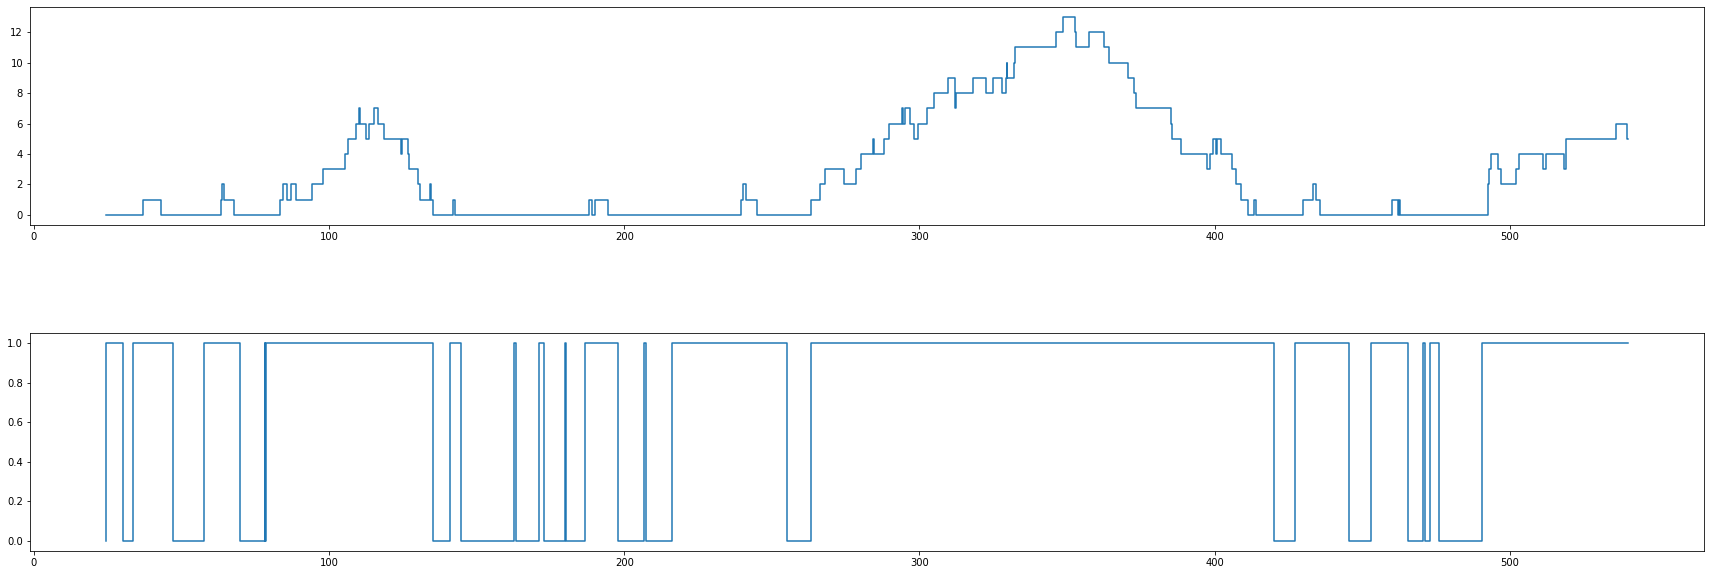

In [38]:
global times, B, Q, area_num_in_q

print(times)
print(len(times))
print(B)
print(len(B))
print(Q)
print(len(Q))
print(np.sum(Q))
print(area_num_in_q)


fig = plt.figure(figsize=(30,10))

gs = fig.add_gridspec(2,1,hspace=0.5)
(ax1,ax2) = gs.subplots()

ax1.step(times, Q)
ax2.step(times, B)
fig.show()